# Modeling

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from scipy.io import arff
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint
from scipy.fft import fft, fftfreq
import numpy as np
import librosa

In [15]:
data, meta = arff.loadarff('./InsectSound/InsectSound.arff')

In [16]:
df = pd.DataFrame(data)

In [17]:
df['target'] = df['target'].str.decode('utf-8')

In [18]:
def truncate_fft(audio_signal, sampling_rate=6000):
    freqs = fft(len(audio_signal), 1/sampling_rate)
    mask = (freqs >= 100) & (freqs <= 2000)
    freq_spectrum = freq_spectrum = np.fft.fft(audio_signal)
    truncated_spectrum = freq_spectrum[mask]
    return truncated_spectrum

In [19]:
def truncate_fft(signal):
    fft_freq = fftfreq(len(signal), d=1/6000)
    fft_values = np.abs(fft(signal))
    mask = (fft_freq >= 100) & (fft_freq <= 2000)
    truncated_fft = fft_values
    return truncated_fft


def truncate(signals):
    fft_arr = []

    for signal in signals.itertuples():
        truncated_signal = truncate_fft(signal[1:])
        fft_arr.append(truncated_signal)

    fft_df = pd.DataFrame(fft_arr)
    return fft_df

def getFFTFeatures(df):
    fft_df = truncate(df.drop('target', axis=1))
    fft_df['target'] = df['target'].values
    return fft_df

Best params: {'pca__n_components': 100, 'rf__class_weight': 'balanced', 'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 9, 'rf__n_estimators': 400}


In [20]:
import numpy as np
from scipy.stats import skew, kurtosis
from sympy import ff

def extract_time_features(signal):
    return [
        np.mean(signal),
        np.std(signal),
        np.max(signal),
        np.min(signal),
        skew(signal),
        kurtosis(signal),
        np.sqrt(np.mean(signal**2)) # RMS
    ]

def extract_mfcc(signal, sr=6000): # sr sesuaikan dengan sampling rate data kamu
    # Ekstrak 13 koefisien MFCC (standar industri)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    # Ambil rata-ratanya agar menjadi 1D array per sampel
    return np.mean(mfccs.T, axis=0)


In [21]:
fft_feature = pd.DataFrame(np.abs(fft(df.drop('target', axis=1))), columns=[f'fft_{i}' for i in range(df.shape[1]-1)])

fft_feature

,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,fft_8,fft_9,...,fft_590,fft_591,fft_592,fft_593,fft_594,fft_595,fft_596,fft_597,fft_598,fft_599
0,0.001266,0.001481,0.001590,0.002030,0.003009,0.004896,0.011060,0.030482,0.020946,0.143084,...,0.227966,0.143084,0.020946,0.030482,0.011060,0.004896,0.003009,0.002030,0.001590,0.001481
1,0.091325,1.663727,2.516106,2.680224,1.956787,0.827690,0.610849,0.228383,0.166626,0.207593,...,0.139338,0.207593,0.166626,0.228383,0.610849,0.827690,1.956787,2.680224,2.516106,1.663727
2,1.460694,4.026402,6.681847,5.384346,3.661780,5.095389,4.347388,2.546683,2.265843,1.140582,...,0.788168,1.140582,2.265843,2.546683,4.347388,5.095389,3.661780,5.384346,6.681847,4.026402
3,2.278270,3.279660,4.604232,5.817501,6.212055,5.468330,4.091834,2.900797,2.261878,1.780031,...,1.188322,1.780031,2.261878,2.900797,4.091834,5.468330,6.212055,5.817501,4.604232,3.279660
4,0.626172,1.206869,1.819648,4.445877,1.071372,4.059844,3.649719,0.369076,2.585278,2.302830,...,0.546604,2.302830,2.585278,0.369076,3.649719,4.059844,1.071372,4.445877,1.819648,1.206869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.359625,2.738969,2.227953,5.612001,4.887800,7.069485,5.069708,4.089418,2.879523,2.683489,...,1.622403,2.683489,2.879523,4.089418,5.069708,7.069485,4.887800,5.612001,2.227953,2.738969
49996,0.519516,3.914984,8.145416,7.378763,6.682145,6.727825,4.843223,2.833997,2.523464,1.585710,...,2.116535,1.585710,2.523464,2.833997,4.843223,6.727825,6.682145,7.378763,8.145416,3.914984
49997,0.286586,2.001550,2.445273,3.810411,9.245578,5.539218,2.689168,3.433499,1.655737,0.436506,...,0.372890,0.436506,1.655737,3.433499,2.689168,5.539218,9.245578,3.810411,2.445273,2.001550
49998,0.280659,0.673674,1.273318,2.141066,3.404932,2.454868,2.586840,2.810489,0.879021,1.301997,...,2.483018,1.301997,0.879021,2.810489,2.586840,2.454868,3.404932,2.141066,1.273318,0.673674


In [22]:
time_domain_features = df.drop('target', axis=1).apply(extract_time_features, axis=1, result_type='expand')

time_domain_features.columns = ['mean', 'std', 'max', 'min', 'skew', 'kurtosis', 'rms']

time_domain_features

,mean,std,max,min,skew,kurtosis,rms
0,-0.000002,0.073110,0.345170,-0.462607,-0.717058,10.633132,0.073110
1,0.000152,0.091712,0.335604,-0.448076,-0.502626,4.108380,0.091712
2,-0.002434,0.071334,0.469603,-0.206496,3.189380,17.501170,0.071375
3,-0.003797,0.082611,0.495580,-0.434625,-0.105349,11.459422,0.082698
4,-0.001044,0.087792,0.466737,-0.217916,1.979427,8.145589,0.087798
...,...,...,...,...,...,...,...
49995,0.003933,0.068933,0.490601,-0.286594,1.435683,13.274223,0.069045
49996,-0.000866,0.089605,0.353256,-0.479459,-1.772936,9.893690,0.089609
49997,-0.000478,0.047818,0.114342,-0.192841,-1.121479,2.536456,0.047820
49998,0.000468,0.033227,0.131041,-0.165053,-1.136498,6.838631,0.033231


In [23]:
X = pd.concat([fft_feature, time_domain_features], axis=1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   Aedes_female       0.64      0.63      0.63      1000
     Aedes_male       0.86      0.89      0.88      1000
    Fruit_flies       0.82      0.76      0.79      1000
    House_flies       0.76      0.80      0.78      1000
   Quinx_female       0.63      0.57      0.60      1000
     Quinx_male       0.58      0.65      0.62      1000
  Stigma_female       0.65      0.70      0.67      1000
    Stigma_male       0.78      0.85      0.81      1000
Tarsalis_female       0.86      0.79      0.82      1000
  Tarsalis_male       0.63      0.57      0.60      1000

       accuracy                           0.72     10000
      macro avg       0.72      0.72      0.72     10000
   weighted avg       0.72      0.72      0.72     10000



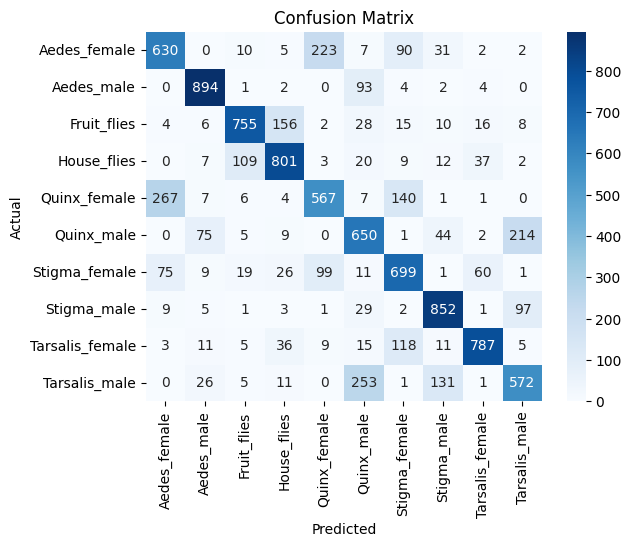

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()